In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

In [2]:
data = pd.read_csv("Heart_disease.csv")

In [3]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


### In male column '1' signifies those instances are male and '0' signifies those instances are female. 

In [4]:
#data.rename(columns = {'male':'gender'},inplace=True)

In [5]:
#data.head()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  CVD              4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [7]:
data_work = data.copy()

In [8]:
data_work.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [9]:
data_work.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [10]:
#lst = [currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes','CVD']
#for i in lst:
#    data_work[i] = data_work[i].astype(dtype = 'bool')

#data_work['currentSmoker'] = data_work['currentSmoker'].astype(dtype = 'bool')
#data_work['BPMeds'] = data_work['BPMeds'].astype(dtype = 'bool')


In [11]:
#data_work['gender'].replace({1:'male',0:'female'}, inplace=True)

In [12]:
data_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  CVD              4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [13]:
data_work.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [14]:
cor = data_work.corr()

In [15]:
cor

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
male,1.000000,-0.029014,0.017415,0.197026,0.317143,-0.052504,-0.004550,0.005853,0.015693,-0.070413,-0.035879,0.058199,0.081871,-0.116932,0.005979,0.088374
age,-0.029014,1.000000,-0.166356,-0.213662,-0.192959,0.123052,0.057679,0.306799,0.101314,0.262554,0.394053,0.205586,0.136096,-0.012843,0.122356,0.225408
education,0.017415,-0.166356,1.000000,0.018528,0.008323,-0.010898,-0.035142,-0.081726,-0.038749,-0.023613,-0.129496,-0.061919,-0.137747,-0.054182,-0.035843,-0.054248
currentSmoker,0.197026,-0.213662,0.018528,1.000000,0.769774,-0.048927,-0.032980,-0.103710,-0.044285,-0.046488,-0.130281,-0.107933,-0.167857,0.062686,-0.056726,0.019448
cigsPerDay,0.317143,-0.192959,0.008323,0.769774,1.000000,-0.046155,-0.032711,-0.066645,-0.037089,-0.026479,-0.088797,-0.056715,-0.093293,0.075564,-0.058886,0.057755
BPMeds,-0.052504,0.123052,-0.010898,-0.048927,-0.046155,1.000000,0.117370,0.261067,0.052060,0.080623,0.254194,0.194122,0.100702,0.015230,0.051197,0.087519
prevalentStroke,-0.004550,0.057679,-0.035142,-0.032980,-0.032711,0.117370,1.000000,0.074791,0.006955,0.000105,0.057000,0.045153,0.025909,-0.017674,0.018440,0.061823
prevalentHyp,0.005853,0.306799,-0.081726,-0.103710,-0.066645,0.261067,0.074791,1.000000,0.077752,0.163632,0.696656,0.615840,0.301344,0.146815,0.086656,0.177458
diabetes,0.015693,0.101314,-0.038749,-0.044285,-0.037089,0.052060,0.006955,0.077752,1.000000,0.040348,0.111265,0.050260,0.087068,0.048986,0.617630,0.097344
totChol,-0.070413,0.262554,-0.023613,-0.046488,-0.026479,0.080623,0.000105,0.163632,0.040348,1.000000,0.208734,0.164698,0.115992,0.091127,0.046538,0.082369


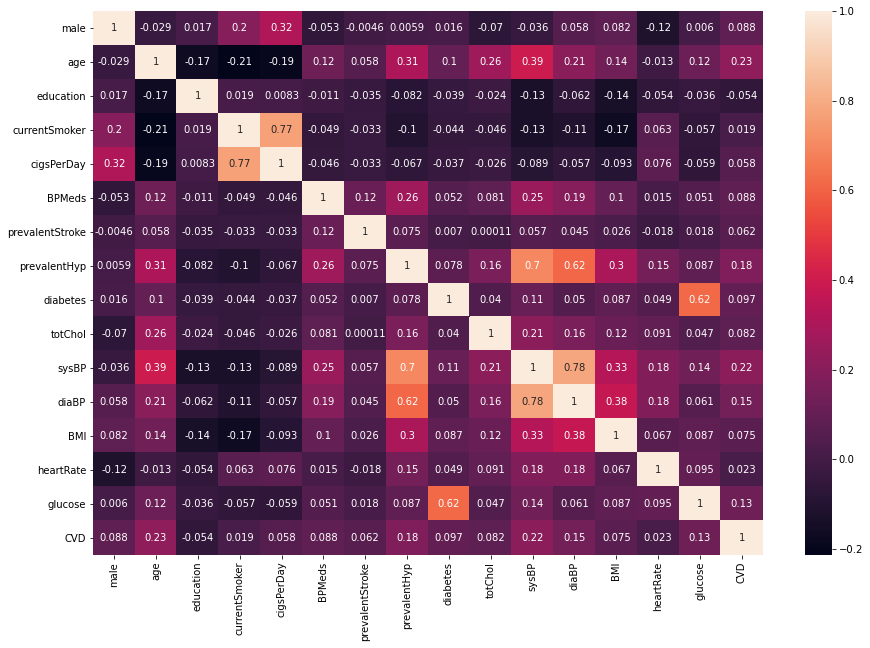

In [16]:
fig = plt.figure(figsize=(15,10))
fig = sns.heatmap(data_work.corr(), annot=True)

In [17]:
cor['CVD'].sort_values(ascending=False)

CVD                1.000000
age                0.225408
sysBP              0.216374
prevalentHyp       0.177458
diaBP              0.145112
glucose            0.125590
diabetes           0.097344
male               0.088374
BPMeds             0.087519
totChol            0.082369
BMI                0.075300
prevalentStroke    0.061823
cigsPerDay         0.057755
heartRate          0.022907
currentSmoker      0.019448
education         -0.054248
Name: CVD, dtype: float64

### We can see some correlation between 'cigsPerDay' and 'currentSmoker' as well as multicollinearity between 'sysBP' , 'diaBP' and 'sysBP' , 'prevalentHyp'

In [18]:
data_work.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'CVD'],
      dtype='object')

In [19]:
data_work['age'].value_counts()

40    192
46    182
42    180
41    174
48    173
39    170
44    166
45    162
43    159
52    149
51    146
55    145
38    144
47    141
50    140
53    139
49    132
54    132
56    123
57    123
59    119
58    117
60    111
61    110
63    110
62     99
64     93
37     92
36     84
65     57
67     45
35     42
66     38
34     18
68     18
69      7
33      5
70      2
32      1
Name: age, dtype: int64

In [20]:
data_work['age'].unique()

array([39, 46, 48, 61, 43, 63, 45, 52, 50, 41, 38, 42, 44, 47, 60, 35, 36,
       59, 54, 37, 56, 53, 49, 65, 51, 62, 40, 67, 57, 66, 64, 55, 58, 34,
       68, 33, 70, 32, 69], dtype=int64)

In [21]:
data_work['education'].value_counts()

1.0    1720
2.0    1253
3.0     689
4.0     473
Name: education, dtype: int64

In [22]:
data_work['currentSmoker'].value_counts()

0    2145
1    2095
Name: currentSmoker, dtype: int64

In [23]:
data_work['male'].value_counts()

0    2420
1    1820
Name: male, dtype: int64

In [24]:
data_work['cigsPerDay'].value_counts()

0.0     2145
20.0     734
30.0     218
15.0     210
10.0     143
9.0      130
5.0      121
3.0      100
40.0      80
1.0       67
43.0      56
25.0      55
35.0      22
6.0       18
2.0       18
7.0       12
60.0      11
8.0       11
4.0        9
18.0       8
17.0       7
50.0       6
23.0       6
11.0       5
16.0       3
12.0       3
13.0       3
45.0       3
19.0       2
14.0       2
70.0       1
38.0       1
29.0       1
Name: cigsPerDay, dtype: int64

## EDA on Numerical columns

<AxesSubplot:xlabel='age', ylabel='count'>

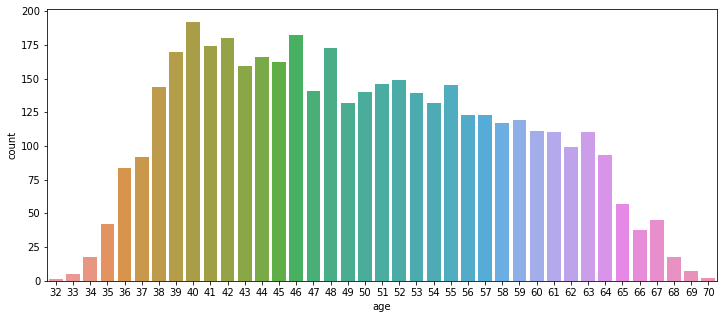

In [25]:
plt.figure(figsize=(12,5))
sns.countplot(x=data_work['age'], data=data_work)

### Inference: The count of people is gradually increasing from age of 32 upto 40 and then a slight decrease and few increase in count upto the age 52 and followed by decrease in count upto the age 70

## Boxplot and Histogram of all continuous attribute

<AxesSubplot:xlabel='age', ylabel='Count'>

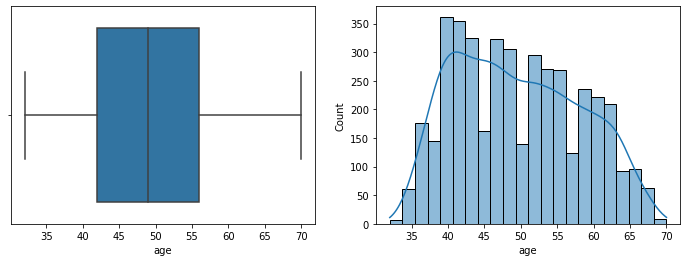

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='age', data=data_work, ax=axes[0])
sns.histplot(x='age', data=data_work, kde=True, ax=axes[1])

## No Outliers are there in Age attribute

<AxesSubplot:xlabel='cigsPerDay', ylabel='count'>

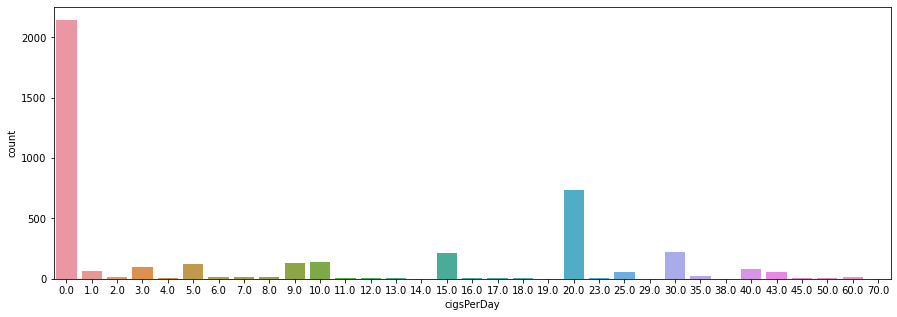

In [27]:
plt.figure(figsize=(15,5))
sns.countplot(x=data_work['cigsPerDay'], data=data_work)

### Inference: We can see that the number of people taking no cigarette is highest and again it has a significant count at 20 cigarretes per day. The attribute shows right skewness distribution

<AxesSubplot:xlabel='cigsPerDay', ylabel='Count'>

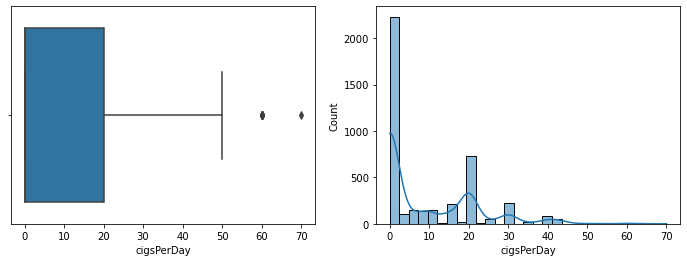

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='cigsPerDay', data=data_work, ax=axes[0])
sns.histplot(x='cigsPerDay', data=data_work, kde=True, ax=axes[1])
#sns.histplot(x='cigsPerDay', data=data_work, kde=True)

### Inference: Only 2 outliers are present for this attribute

In [29]:
data_work['BMI'].nunique()

1364

In [30]:
data_work['BMI'].value_counts()

22.19    18
22.54    18
22.91    18
23.48    18
25.09    16
         ..
35.78     1
19.37     1
31.29     1
34.91     1
39.60     1
Name: BMI, Length: 1364, dtype: int64

<AxesSubplot:xlabel='BMI', ylabel='Count'>

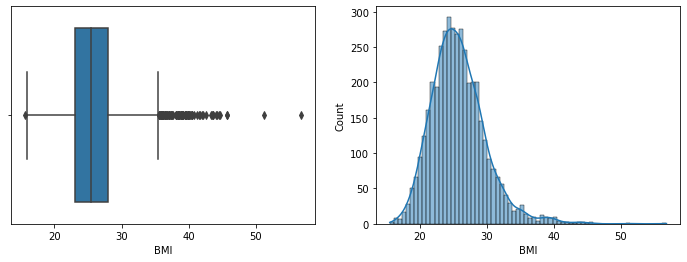

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='BMI', data=data_work, ax=axes[0])
sns.histplot(x='BMI', data=data_work, kde=True, ax=axes[1])

### Inference: The attribute has some outliers starting from the value approximately 35 and also has right skewed distribution

In [32]:
data_work['heartRate'].nunique()

73

<AxesSubplot:xlabel='heartRate', ylabel='count'>

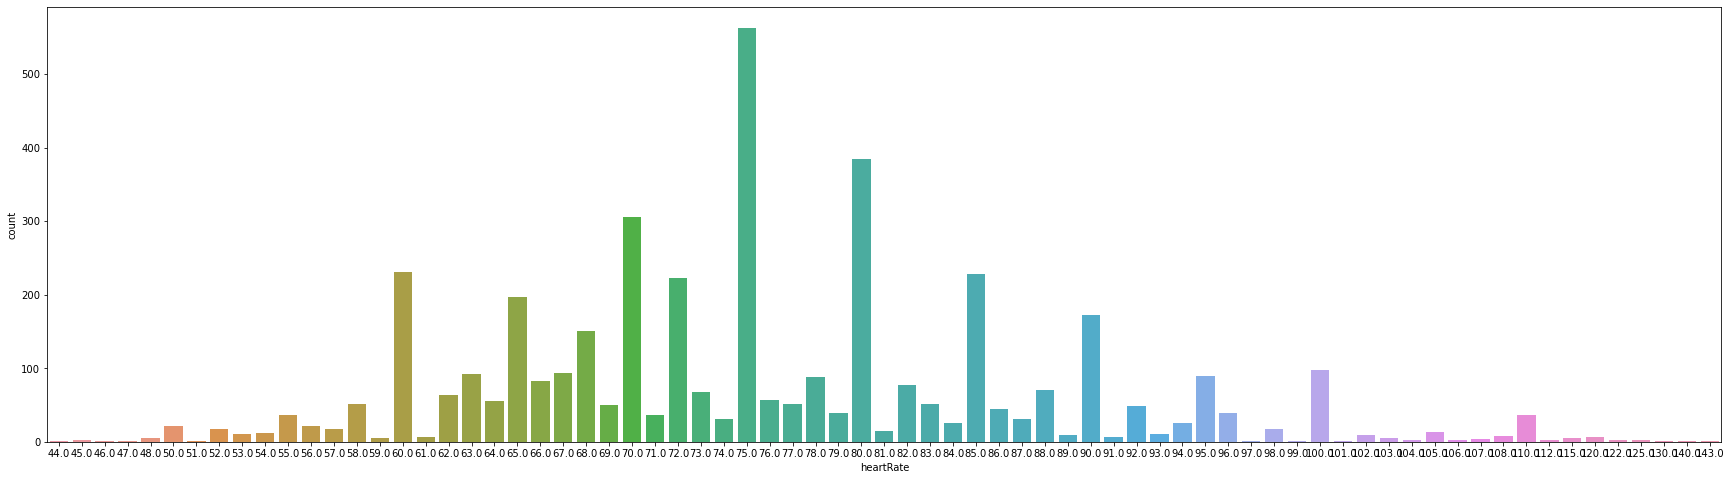

In [33]:
plt.figure(figsize=(30,8))
sns.countplot(x='heartRate', data=data_work)

<AxesSubplot:xlabel='heartRate', ylabel='Count'>

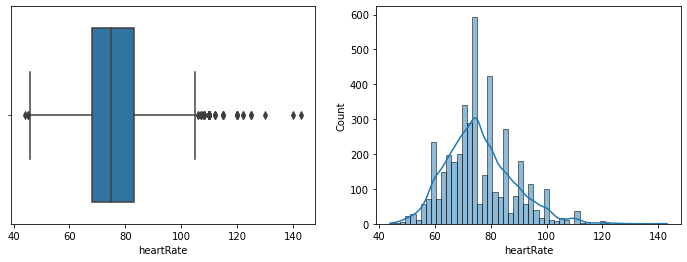

In [34]:
fig, axes= plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='heartRate', data=data_work, ax=axes[0])
sns.histplot(x='heartRate', data=data_work, kde=True, ax=axes[1])

In [35]:
data_work['glucose'].nunique()

143

<AxesSubplot:xlabel='glucose', ylabel='Count'>

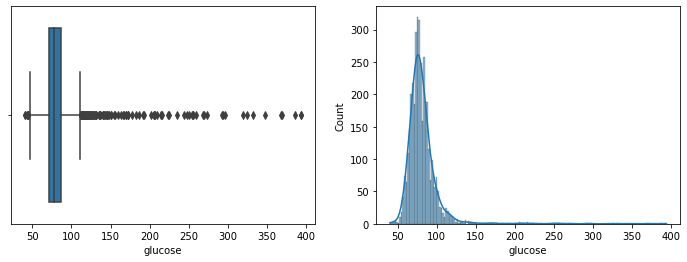

In [36]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='glucose', data=data_work, ax=axes[0])
sns.histplot(x='glucose', data=data_work, kde=True, ax=axes[1])

### Inference: Tnis attribute has high number of outliers and the attribute is showing right skewness

In [37]:
data_work['totChol'].nunique()

248

<AxesSubplot:xlabel='totChol', ylabel='Count'>

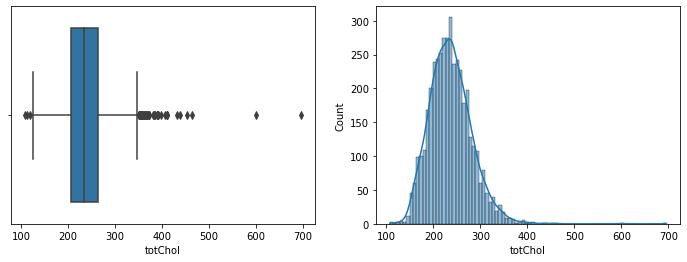

In [38]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='totChol', data=data_work, ax=axes[0])
sns.histplot(x='totChol', data=data_work, kde=True, ax=axes[1])

### Inference: This attribute has few outliers and is showing right skewness

In [39]:
data_work['sysBP'].nunique()

234

<AxesSubplot:xlabel='sysBP', ylabel='Count'>

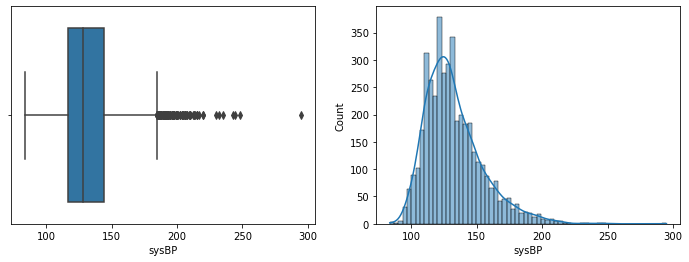

In [40]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='sysBP', data=data_work, ax=axes[0])
sns.histplot(x='sysBP', data=data_work, kde=True, ax=axes[1])

### Inference: This attribute has few outliers and is showing right skewness

In [41]:
data_work['diaBP'].nunique()

146

<AxesSubplot:xlabel='diaBP', ylabel='Count'>

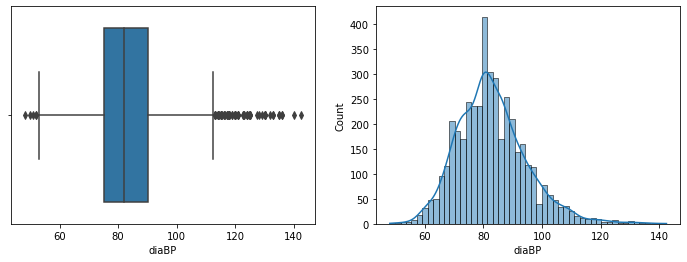

In [42]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='diaBP', data=data_work, ax=axes[0])
sns.histplot(x='diaBP', data=data_work, kde=True, ax=axes[1])

#### Observations: BMI, heartRate, glucose, totChol, sysBP, diaBP have some outliers and almost normally distributed having rightskewness. We can treat the outliers separately

## EDA on categorical attributes

<AxesSubplot:xlabel='male', ylabel='count'>

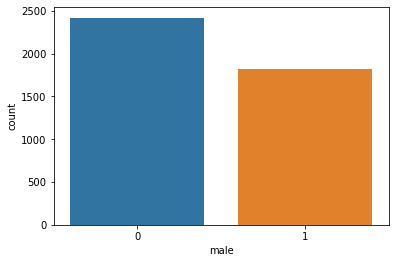

In [43]:
sns.countplot(x=data_work['male'], data=data_work)

<AxesSubplot:xlabel='currentSmoker', ylabel='count'>

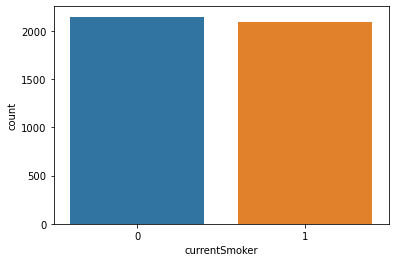

In [44]:
sns.countplot(x=data_work['currentSmoker'], data=data_work)

<AxesSubplot:xlabel='BPMeds', ylabel='count'>

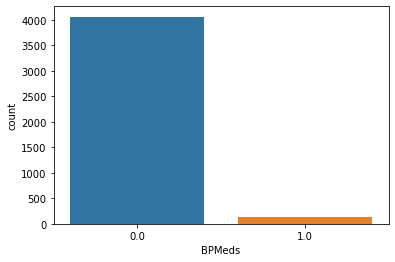

In [45]:
sns.countplot(x='BPMeds', data=data_work)

In [46]:
data_work['BPMeds'].value_counts(normalize=True)

0.0    0.970385
1.0    0.029615
Name: BPMeds, dtype: float64

<AxesSubplot:xlabel='prevalentStroke', ylabel='count'>

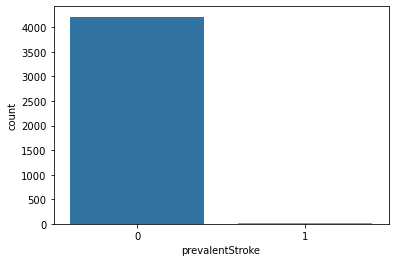

In [47]:
sns.countplot(x='prevalentStroke', data=data_work)

In [48]:
data_work['prevalentStroke'].value_counts(normalize=True)

0    0.994104
1    0.005896
Name: prevalentStroke, dtype: float64

In [49]:
# As prevalentStroke feature is extremely biased so we can drop this column. 
data_work = data_work.drop('prevalentStroke', axis=1)

In [50]:
data_work.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4.0,0,0.0,0.0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [51]:
data_work['prevalentHyp'].value_counts()

0    2923
1    1317
Name: prevalentHyp, dtype: int64

<AxesSubplot:xlabel='prevalentHyp', ylabel='count'>

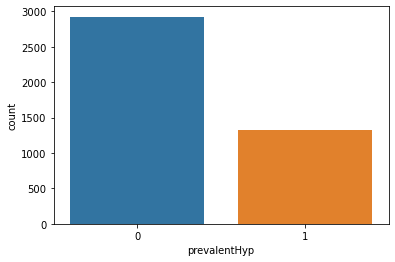

In [52]:
sns.countplot(x='prevalentHyp', data=data_work)

<AxesSubplot:xlabel='diabetes', ylabel='count'>

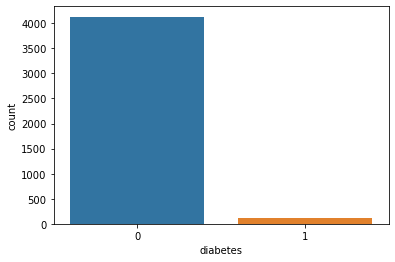

In [53]:
sns.countplot(x='diabetes', data=data_work)

In [54]:
data_work['diabetes'].value_counts(normalize=True)

0    0.974292
1    0.025708
Name: diabetes, dtype: float64

In [55]:
# As diabetes feature is extremely biased so we can drop this column. 
data_work = data_work.drop('diabetes', axis=1)

In [56]:
# As BPMeds feature is extremely biased so we can drop this column. 
data_work = data_work.drop('BPMeds', axis=1)

In [57]:
data_work.head()

,male,age,education,currentSmoker,cigsPerDay,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4.0,0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,1,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Checking the count of categories in target(CVD) feature

<AxesSubplot:xlabel='CVD', ylabel='count'>

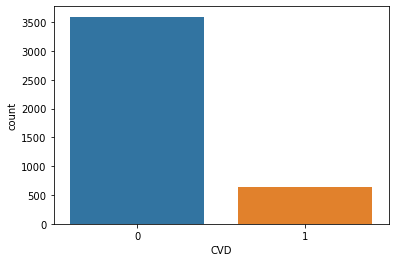

In [58]:
sns.countplot(x='CVD', data=data_work)

In [59]:
data_work['CVD'].value_counts(normalize=True)

0    0.848113
1    0.151887
Name: CVD, dtype: float64

In [60]:
data_work['age'].nunique()

39

In [61]:
data_work.head()

,male,age,education,currentSmoker,cigsPerDay,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4.0,0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,1,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [62]:
data_work.shape

(4240, 13)

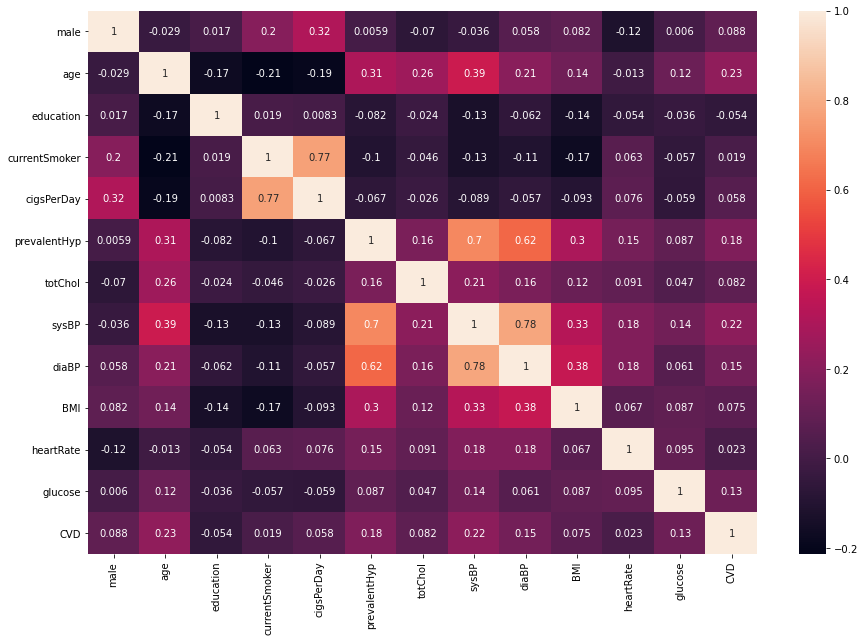

In [63]:
fig = plt.figure(figsize=(15,10))
fig = sns.heatmap(data_work.corr(), annot=True)

In [64]:
data_work.corr()['CVD'].sort_values(ascending=False)

CVD              1.000000
age              0.225408
sysBP            0.216374
prevalentHyp     0.177458
diaBP            0.145112
glucose          0.125590
male             0.088374
totChol          0.082369
BMI              0.075300
cigsPerDay       0.057755
heartRate        0.022907
currentSmoker    0.019448
education       -0.054248
Name: CVD, dtype: float64

In [65]:
data_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4240 non-null   int64  
 1   age            4240 non-null   int64  
 2   education      4135 non-null   float64
 3   currentSmoker  4240 non-null   int64  
 4   cigsPerDay     4211 non-null   float64
 5   prevalentHyp   4240 non-null   int64  
 6   totChol        4190 non-null   float64
 7   sysBP          4240 non-null   float64
 8   diaBP          4240 non-null   float64
 9   BMI            4221 non-null   float64
 10  heartRate      4239 non-null   float64
 11  glucose        3852 non-null   float64
 12  CVD            4240 non-null   int64  
dtypes: float64(8), int64(5)
memory usage: 430.8 KB


<AxesSubplot:xlabel='age'>

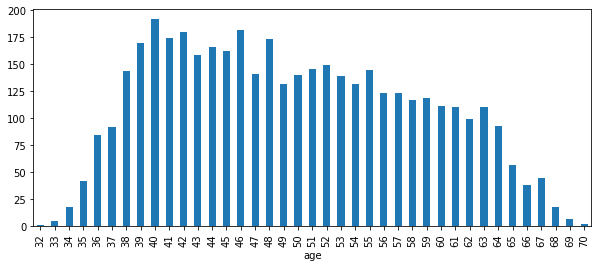

In [66]:
plt.figure(figsize=(10,4))
data_work.groupby(by = 'age')['CVD'].count().plot(kind='bar')

## Checking the null values

In [67]:
data_work.isnull().sum()

male               0
age                0
education        105
currentSmoker      0
cigsPerDay        29
prevalentHyp       0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          388
CVD                0
dtype: int64

In [68]:
print("percentage of null value in glucose: ",(388/4240)*100)

percentage of null value in glucose:  9.150943396226415


### As the attribute having maximum number of null values contribute more than 5%(9.15%) so we can't drop the null values instead we are imputing them. As all the null values are found in the numerical attributes so we are going to impute them using median instead of mean as mean is impacted by outliers

In [69]:
data_work['education']=='NA'

0       False
1       False
2       False
3       False
4       False
        ...  
4235    False
4236    False
4237    False
4238    False
4239    False
Name: education, Length: 4240, dtype: bool

In [70]:
#data_work.loc[33,:]

In [71]:
data_work['education'].dtype

dtype('float64')

In [72]:
data_work[data_work['education'].isnull()]

,male,age,education,currentSmoker,cigsPerDay,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
33,1,61,NaN,1,5.0,0,175.0,134.0,82.5,18.59,72.0,75.0,1
36,1,56,NaN,0,0.0,0,257.0,153.5,102.0,28.09,72.0,75.0,0
72,0,37,NaN,0,0.0,0,200.0,119.0,79.0,33.29,67.0,87.0,0
184,1,67,NaN,0,0.0,0,257.0,125.0,67.5,25.95,65.0,69.0,0
213,0,34,NaN,0,0.0,0,163.0,107.0,71.0,23.88,73.0,80.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4082,1,47,NaN,0,0.0,1,254.0,137.5,91.0,31.98,75.0,69.0,0
4098,1,37,NaN,1,20.0,0,184.0,113.0,81.0,22.16,85.0,63.0,0
4121,0,55,NaN,0,0.0,0,240.0,145.0,96.0,26.27,72.0,NaN,0
4122,1,69,NaN,1,23.0,1,186.0,179.0,93.0,26.64,72.0,67.0,0


In [73]:
data_null_edu = data_work[data_work['education'].isnull()]

In [74]:
data_null_edu

,male,age,education,currentSmoker,cigsPerDay,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
33,1,61,NaN,1,5.0,0,175.0,134.0,82.5,18.59,72.0,75.0,1
36,1,56,NaN,0,0.0,0,257.0,153.5,102.0,28.09,72.0,75.0,0
72,0,37,NaN,0,0.0,0,200.0,119.0,79.0,33.29,67.0,87.0,0
184,1,67,NaN,0,0.0,0,257.0,125.0,67.5,25.95,65.0,69.0,0
213,0,34,NaN,0,0.0,0,163.0,107.0,71.0,23.88,73.0,80.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4082,1,47,NaN,0,0.0,1,254.0,137.5,91.0,31.98,75.0,69.0,0
4098,1,37,NaN,1,20.0,0,184.0,113.0,81.0,22.16,85.0,63.0,0
4121,0,55,NaN,0,0.0,0,240.0,145.0,96.0,26.27,72.0,NaN,0
4122,1,69,NaN,1,23.0,1,186.0,179.0,93.0,26.64,72.0,67.0,0


In [75]:
data_null_edu['CVD'].value_counts(normalize=True)

0    0.847619
1    0.152381
Name: CVD, dtype: float64

## Inference: The ratio of the persons having CVD and non-CVD is maintained in the original data as well as in the data having education as null

In [76]:
education_mode = data_work['education'].mode()

In [77]:
education_mode[0]

1.0

In [78]:
data_work['education'].fillna(value=education_mode[0], inplace=True)

In [79]:
data_work.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay        29
prevalentHyp       0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          388
CVD                0
dtype: int64

In [80]:
data_work['cigsPerDay'].describe()

count    4211.000000
mean        9.005937
std        11.922462
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64

In [81]:
data_work['totChol'].describe()

count    4190.000000
mean      236.699523
std        44.591284
min       107.000000
25%       206.000000
50%       234.000000
75%       263.000000
max       696.000000
Name: totChol, dtype: float64

In [82]:
data_work['BMI'].describe()

count    4221.000000
mean       25.800801
std         4.079840
min        15.540000
25%        23.070000
50%        25.400000
75%        28.040000
max        56.800000
Name: BMI, dtype: float64

In [83]:
data_work['glucose'].describe()

count    3852.000000
mean       81.963655
std        23.954335
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

In [84]:
data_work['heartRate'].describe()

count    4239.000000
mean       75.878981
std        12.025348
min        44.000000
25%        68.000000
50%        75.000000
75%        83.000000
max       143.000000
Name: heartRate, dtype: float64

## Imputing Null values of all numeric columns using median

In [85]:
data_work['cigsPerDay'].fillna(value=data_work['cigsPerDay'].median(), inplace=True)
data_work['totChol'].fillna(value=data_work['totChol'].median(), inplace=True)
data_work['BMI'].fillna(value=data_work['BMI'].median(), inplace=True)
data_work['glucose'].fillna(value=data_work['glucose'].median(), inplace=True)
data_work['heartRate'].fillna(value=data_work['heartRate'].median(),inplace=True)

In [86]:
data_work.isnull().sum()

male             0
age              0
education        0
currentSmoker    0
cigsPerDay       0
prevalentHyp     0
totChol          0
sysBP            0
diaBP            0
BMI              0
heartRate        0
glucose          0
CVD              0
dtype: int64

## User Defined function for Outlier Treatment 

In [87]:
outliers = []
upper_lim = 0
lower_lim = 0
def outlier_detection(x):
    global outliers
    x_dict = dict(data_work[x].describe())
    print(x_dict)
    Q1 = x_dict['25%']
    print("Q1 :", Q1)
    Q3 = x_dict['75%']
    print("Q3 :", Q3)
    IQR = Q3 - Q1
    print("Inter quartile range is ", IQR)
    global lower_lim
    global upper_lim
    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR
    print("The lower limit is ", round(lower_lim))
    print("The upper limit is ", round(upper_lim))

    for i in data_work[x]:
        if ((i > upper_lim) | (i < lower_lim)):
            outliers.append(i)
#    print("The outliers of ", x ,"is :", outliers)

In [88]:
outlier_detection('cigsPerDay')

{'count': 4240.0, 'mean': 8.94433962264151, 'std': 11.90477734169414, 'min': 0.0, '25%': 0.0, '50%': 0.0, '75%': 20.0, 'max': 70.0}
Q1 : 0.0
Q3 : 20.0
Inter quartile range is  20.0
The lower limit is  -30
The upper limit is  50


In [89]:
data_work.loc[((data_work['cigsPerDay'] >= 50) & (data_work['cigsPerDay'] <= 70)), 'cigsPerDay']= round(upper_lim)

Text(0.5, 0, 'Histogram of cigsPerDay after outlier treatment')

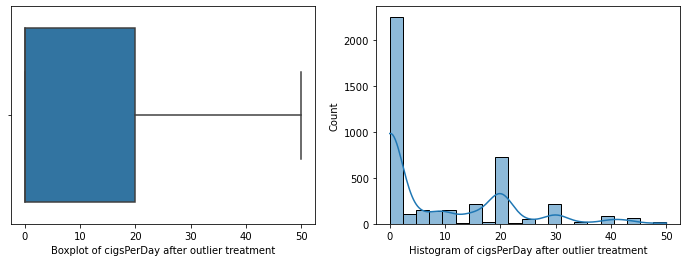

In [90]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='cigsPerDay', data=data_work, ax=axes[0])
axes[0].set_xlabel('Boxplot of cigsPerDay after outlier treatment')
sns.histplot(x='cigsPerDay', data=data_work, kde=True, ax=axes[1])
axes[1].set_xlabel('Histogram of cigsPerDay after outlier treatment')

In [91]:
outliers.clear()
outlier_detection('BMI')

{'count': 4240.0, 'mean': 25.79900471698112, 'std': 4.070774635557685, 'min': 15.54, '25%': 23.0775, '50%': 25.4, '75%': 28.0325, 'max': 56.8}
Q1 : 23.0775
Q3 : 28.0325
Inter quartile range is  4.954999999999998
The lower limit is  16
The upper limit is  35


In [92]:
data_work.loc[((data_work['BMI'] >= 35) & (data_work['BMI'] <= 56.8)), 'BMI']= round(upper_lim)

In [93]:
data_work.loc[(data_work['BMI'] <= 16),'BMI'] = round(lower_lim)

Text(0.5, 0, 'Histogram of BMI after outlier treatment')

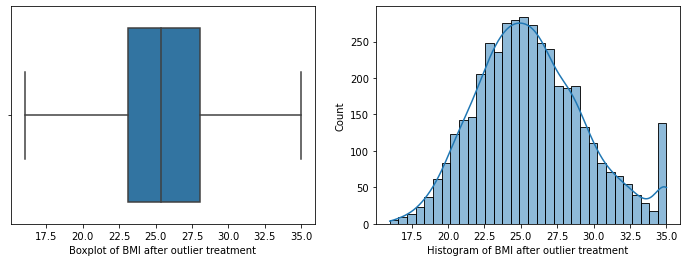

In [94]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='BMI', data=data_work, ax=axes[0])
axes[0].set_xlabel('Boxplot of BMI after outlier treatment')
sns.histplot(x='BMI', data=data_work, kde=True, ax=axes[1])
axes[1].set_xlabel('Histogram of BMI after outlier treatment')

In [95]:
outliers.clear()
outlier_detection('heartRate')

{'count': 4240.0, 'mean': 75.87877358490566, 'std': 12.023937060119858, 'min': 44.0, '25%': 68.0, '50%': 75.0, '75%': 83.0, 'max': 143.0}
Q1 : 68.0
Q3 : 83.0
Inter quartile range is  15.0
The lower limit is  46
The upper limit is  106


In [96]:
data_work.loc[((data_work['heartRate'] >= 106) & (data_work['heartRate'] <= 143)), 'heartRate']= round(upper_lim)

In [97]:
data_work.loc[(data_work['heartRate'] <= 46),'heartRate'] = round(lower_lim)

Text(0.5, 0, 'Histogram of heartRate after outlier treatment')

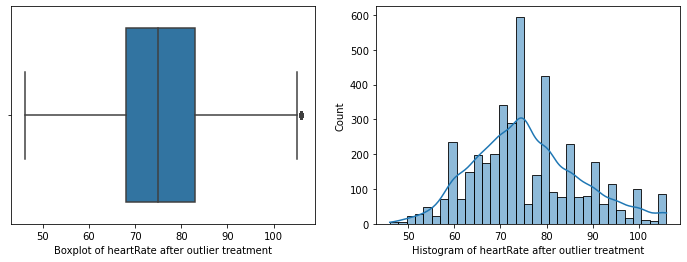

In [98]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='heartRate', data=data_work, ax=axes[0])
axes[0].set_xlabel('Boxplot of heartRate after outlier treatment')
sns.histplot(x='heartRate', data=data_work, kde=True, ax=axes[1])
axes[1].set_xlabel('Histogram of heartRate after outlier treatment')

In [99]:
outliers.clear()
outlier_detection('glucose')

{'count': 4240.0, 'mean': 81.60094339622641, 'std': 22.860339880961636, 'min': 40.0, '25%': 72.0, '50%': 78.0, '75%': 85.0, 'max': 394.0}
Q1 : 72.0
Q3 : 85.0
Inter quartile range is  13.0
The lower limit is  52
The upper limit is  104


In [100]:
data_work.loc[((data_work['glucose'] >= 104) & (data_work['glucose'] <= 394)), 'glucose']= round(upper_lim)

In [101]:
data_work.loc[(data_work['glucose'] <= 52),'glucose'] = round(lower_lim)

Text(0.5, 0, 'Histogram of glucose after outlier treatment')

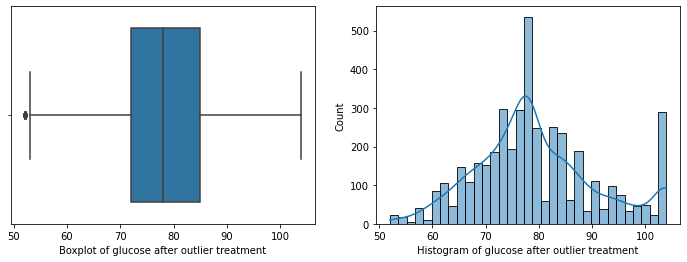

In [102]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='glucose', data=data_work, ax=axes[0])
axes[0].set_xlabel('Boxplot of glucose after outlier treatment')
sns.histplot(x='glucose', data=data_work, kde=True, ax=axes[1])
axes[1].set_xlabel('Histogram of glucose after outlier treatment')

In [103]:
outliers.clear()
outlier_detection('totChol')

{'count': 4240.0, 'mean': 236.6676886792453, 'std': 44.32847956803451, 'min': 107.0, '25%': 206.0, '50%': 234.0, '75%': 262.0, 'max': 696.0}
Q1 : 206.0
Q3 : 262.0
Inter quartile range is  56.0
The lower limit is  122
The upper limit is  346


In [104]:
data_work.loc[((data_work['totChol'] >= 348) & (data_work['totChol']  <= 696)), 'totChol'] = round(upper_lim)

In [105]:
data_work.loc[(data_work['totChol'] <= 120),'totChol'] = round(lower_lim)

Text(0.5, 0, 'Histogram of totChol after outlier treatment')

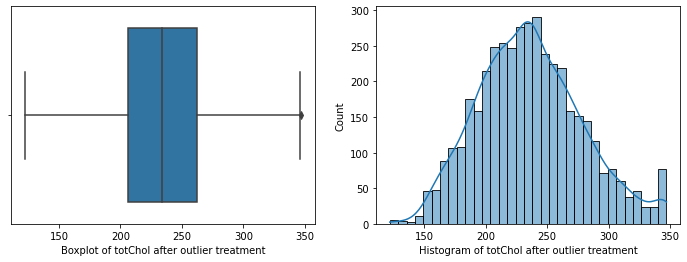

In [106]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='totChol', data=data_work, ax=axes[0])
axes[0].set_xlabel('Boxplot of totChol after outlier treatment')
sns.histplot(x='totChol', data=data_work, kde=True, ax=axes[1])
axes[1].set_xlabel('Histogram of totChol after outlier treatment')

In [107]:
outliers.clear()
outlier_detection('sysBP')

{'count': 4240.0, 'mean': 132.35459905660377, 'std': 22.0332996088492, 'min': 83.5, '25%': 117.0, '50%': 128.0, '75%': 144.0, 'max': 295.0}
Q1 : 117.0
Q3 : 144.0
Inter quartile range is  27.0
The lower limit is  76
The upper limit is  184


In [108]:
data_work.loc[((data_work['sysBP'] >= 184) & (data_work['sysBP']  <= 295)), 'sysBP'] = round(upper_lim)

Text(0.5, 0, 'Histogram of sysBP after outlier treatment')

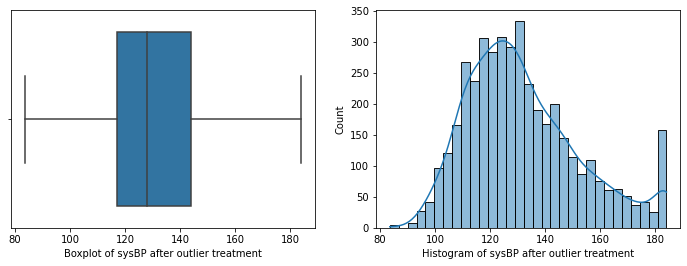

In [109]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='sysBP', data=data_work, ax=axes[0])
axes[0].set_xlabel('Boxplot of sysBP after outlier treatment')
sns.histplot(x='sysBP', data=data_work, kde=True, ax=axes[1])
axes[1].set_xlabel('Histogram of sysBP after outlier treatment')

In [110]:
outliers.clear()
outlier_detection('diaBP')

{'count': 4240.0, 'mean': 82.89775943396226, 'std': 11.910394483305936, 'min': 48.0, '25%': 75.0, '50%': 82.0, '75%': 90.0, 'max': 142.5}
Q1 : 75.0
Q3 : 90.0
Inter quartile range is  15.0
The lower limit is  52
The upper limit is  112


In [111]:
data_work.loc[((data_work['diaBP'] >= 112) & (data_work['diaBP']  <= 142)), 'diaBP'] = round(upper_lim)

In [112]:
data_work.loc[(data_work['diaBP'] <= 52), 'diaBP'] = round(lower_lim)

Text(0.5, 0, 'Histogram of diaBP after outlier treatment')

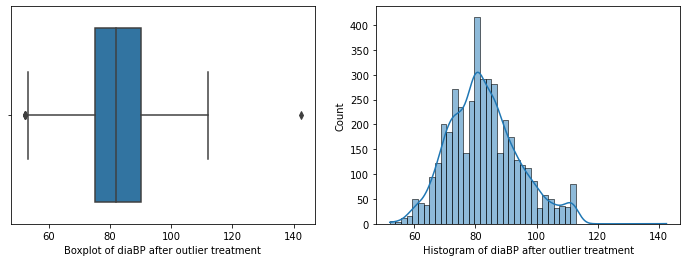

In [113]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='diaBP', data=data_work, ax=axes[0])
axes[0].set_xlabel('Boxplot of diaBP after outlier treatment')
sns.histplot(x='diaBP', data=data_work, kde=True, ax=axes[1])
axes[1].set_xlabel('Histogram of diaBP after outlier treatment')

In [114]:
data_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4240 non-null   int64  
 1   age            4240 non-null   int64  
 2   education      4240 non-null   float64
 3   currentSmoker  4240 non-null   int64  
 4   cigsPerDay     4240 non-null   float64
 5   prevalentHyp   4240 non-null   int64  
 6   totChol        4240 non-null   float64
 7   sysBP          4240 non-null   float64
 8   diaBP          4240 non-null   float64
 9   BMI            4240 non-null   float64
 10  heartRate      4240 non-null   float64
 11  glucose        4240 non-null   float64
 12  CVD            4240 non-null   int64  
dtypes: float64(8), int64(5)
memory usage: 430.8 KB


### education attribute seems to be a categorical column . But its datatype is float. So need to change its datatype

In [115]:
data_work['education'] = pd.Categorical(data_work['education'])

In [116]:
data_work['education']

C:\Users\rajde\anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


0       4.0
1       2.0
2       1.0
3       3.0
4       3.0
       ... 
4235    2.0
4236    1.0
4237    2.0
4238    3.0
4239    3.0
Name: education, Length: 4240, dtype: category
Categories (4, float64): [1.0, 2.0, 3.0, 4.0]

<AxesSubplot:xlabel='education', ylabel='count'>

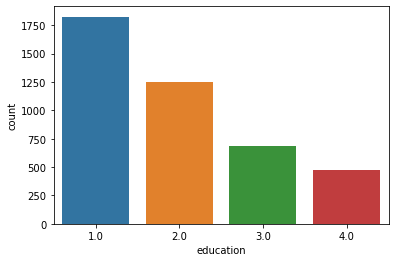

In [117]:
sns.countplot(x='education', data=data_work)

In [118]:
data_work.head(5)

,male,age,education,currentSmoker,cigsPerDay,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4.0,0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,1,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Separating the Target and features

In [119]:
X = data_work.drop('CVD', axis=1)
y = data_work['CVD']

In [120]:
X.head()

,male,age,education,currentSmoker,cigsPerDay,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,1,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [121]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: CVD, dtype: int64

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=42 )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42 )

In [124]:
X_train

,male,age,education,currentSmoker,cigsPerDay,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose
4097,1,54,2.0,1,40.0,0,245.0,152.0,82.0,23.71,75.0,75.0
3165,1,44,3.0,1,30.0,0,346.0,140.0,87.0,26.44,95.0,79.0
2499,0,46,2.0,1,15.0,0,232.0,115.0,70.0,25.18,75.0,59.0
3345,1,38,2.0,1,15.0,0,150.0,123.0,76.0,20.39,60.0,82.0
3596,1,40,2.0,1,15.0,0,200.0,122.5,75.0,20.25,60.0,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3444,0,36,1.0,1,5.0,1,222.0,147.0,94.0,26.79,76.0,71.0
466,0,57,3.0,1,15.0,0,250.0,125.0,74.0,21.08,80.0,72.0
3092,0,60,2.0,0,0.0,1,298.0,133.0,89.0,25.09,83.0,81.0
3772,1,39,2.0,1,10.0,0,215.0,102.0,64.5,24.50,68.0,62.0


In [125]:
y_train

4097    0
3165    0
2499    1
3345    0
3596    0
       ..
3444    0
466     0
3092    0
3772    0
860     0
Name: CVD, Length: 2968, dtype: int64

In [126]:
X_test

,male,age,education,currentSmoker,cigsPerDay,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose
1350,0,49,3.0,1,10.0,0,260.0,123.0,80.0,23.10,63.0,65.0
1434,1,43,1.0,1,25.0,0,201.0,121.0,82.0,23.84,70.0,91.0
2500,1,45,1.0,1,1.0,1,277.0,140.0,84.0,28.74,69.0,74.0
1128,0,63,3.0,1,10.0,1,236.0,184.0,103.0,27.91,60.0,74.0
4144,1,59,2.0,0,0.0,0,237.0,131.5,84.0,24.17,90.0,94.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1859,0,67,2.0,1,3.0,1,326.0,157.5,78.0,24.63,85.0,77.0
3164,1,39,2.0,1,30.0,1,292.0,153.0,100.0,28.09,106.0,69.0
610,1,55,2.0,1,15.0,1,222.0,155.0,92.5,28.35,67.0,68.0
570,0,49,3.0,1,3.0,0,247.0,121.0,82.0,29.07,72.0,69.0


In [127]:
y_test

1350    1
1434    0
2500    0
1128    0
4144    1
       ..
1859    0
3164    1
610     1
570     0
343     1
Name: CVD, Length: 1272, dtype: int64

In [128]:
y_train.value_counts(normalize=True)

0    0.84872
1    0.15128
Name: CVD, dtype: float64

In [129]:
y_test.value_counts(normalize=True)

0    0.846698
1    0.153302
Name: CVD, dtype: float64

In [130]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2968 entries, 4097 to 860
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   male           2968 non-null   int64   
 1   age            2968 non-null   int64   
 2   education      2968 non-null   category
 3   currentSmoker  2968 non-null   int64   
 4   cigsPerDay     2968 non-null   float64 
 5   prevalentHyp   2968 non-null   int64   
 6   totChol        2968 non-null   float64 
 7   sysBP          2968 non-null   float64 
 8   diaBP          2968 non-null   float64 
 9   BMI            2968 non-null   float64 
 10  heartRate      2968 non-null   float64 
 11  glucose        2968 non-null   float64 
dtypes: category(1), float64(7), int64(4)
memory usage: 281.3 KB


## Preprocessing on Train Dataset

### Numerical column

In [131]:
X_train_num = X_train[['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']]

In [132]:
from sklearn.preprocessing import StandardScaler

In [133]:
scaler = StandardScaler()

In [134]:
X_train_num_scaled = scaler.fit_transform(X_train_num)

In [135]:
X_train_num_scaled.shape

(2968, 8)

In [136]:
type(X_train_num_scaled)

numpy.ndarray

In [137]:
X_train_num_columns_scaled_df = pd.DataFrame(X_train_num_scaled, columns=X_train_num.columns)

In [138]:
X_train_num_columns_scaled_df.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,0.525340,2.638073,0.206902,0.967911,-0.070553,-0.531390,-0.076405,-0.390248
1,-0.646204,1.784400,2.640016,0.389012,0.369275,0.193165,1.644818,-0.037067
2,-0.411896,0.503891,-0.106271,-0.817026,-1.126141,-0.141245,-0.076405,-1.802969
3,-1.349131,0.503891,-2.081671,-0.431094,-0.598347,-1.412534,-1.367323,0.227818
4,-1.114822,0.503891,-0.877159,-0.455214,-0.686313,-1.449691,-1.367323,-1.096608


In [139]:
X_train_cat_already_hot_encoded = X_train[['male','currentSmoker','prevalentHyp']]

In [140]:
X_train_cat = X_train[['education']]

In [141]:
X_train_dummy = pd.get_dummies(X_train_cat)

In [142]:
X_train_dummy.head(5)

,education_1.0,education_2.0,education_3.0,education_4.0
4097,0,1,0,0
3165,0,0,1,0
2499,0,1,0,0
3345,0,1,0,0
3596,0,1,0,0


In [143]:
X_train_dummy.index

Int64Index([4097, 3165, 2499, 3345, 3596, 2830, 1940, 1488, 1448, 1135,
            ...
             769, 1685,  130, 2919, 3171, 3444,  466, 3092, 3772,  860],
           dtype='int64', length=2968)

In [144]:
X_train_cat_already_hot_encoded.index

Int64Index([4097, 3165, 2499, 3345, 3596, 2830, 1940, 1488, 1448, 1135,
            ...
             769, 1685,  130, 2919, 3171, 3444,  466, 3092, 3772,  860],
           dtype='int64', length=2968)

In [145]:
X_train_num_columns_scaled_df.index

RangeIndex(start=0, stop=2968, step=1)

In [146]:
X_train_num_columns_scaled_df.index = X_train_dummy.index

In [147]:
X_train_num_columns_scaled_df.index

Int64Index([4097, 3165, 2499, 3345, 3596, 2830, 1940, 1488, 1448, 1135,
            ...
             769, 1685,  130, 2919, 3171, 3444,  466, 3092, 3772,  860],
           dtype='int64', length=2968)

In [148]:
## Concatenating three dataframes to create final train set
X_train_final = pd.concat([X_train_num_columns_scaled_df, X_train_dummy, X_train_cat_already_hot_encoded], axis=1)

In [149]:
X_train_final.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,education_1.0,education_2.0,education_3.0,education_4.0,male,currentSmoker,prevalentHyp
4097,0.525340,2.638073,0.206902,0.967911,-0.070553,-0.531390,-0.076405,-0.390248,0,1,0,0,1,1,0
3165,-0.646204,1.784400,2.640016,0.389012,0.369275,0.193165,1.644818,-0.037067,0,0,1,0,1,1,0
2499,-0.411896,0.503891,-0.106271,-0.817026,-1.126141,-0.141245,-0.076405,-1.802969,0,1,0,0,0,1,0
3345,-1.349131,0.503891,-2.081671,-0.431094,-0.598347,-1.412534,-1.367323,0.227818,0,1,0,0,1,1,0
3596,-1.114822,0.503891,-0.877159,-0.455214,-0.686313,-1.449691,-1.367323,-1.096608,0,1,0,0,1,1,0


In [150]:
X_train_final.shape

(2968, 15)

## Preprocessing on Test Dataset

In [151]:
X_test_num = X_test[['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']]

In [152]:
X_test_num_scaled = scaler.transform(X_test_num)

In [153]:
X_test_num_scaled.shape

(1272, 8)

In [154]:
X_test_num_scaled_df = pd.DataFrame(X_test_num_scaled, columns=X_test_num.columns)

In [155]:
X_test_num_scaled_df.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,-0.060432,0.077055,0.568255,-0.431094,-0.246485,-0.693287,-1.109140,-1.273199
1,-0.763359,1.357564,-0.853069,-0.527577,-0.070553,-0.496888,-0.506711,1.022474
2,-0.529050,-0.691250,0.977789,0.389012,0.105378,0.803596,-0.592772,-0.478543
3,1.579729,0.077055,-0.009910,2.511640,1.776725,0.583310,-1.367323,-0.478543
4,1.111112,-0.776618,0.014180,-0.021041,0.105378,-0.409304,1.214512,1.287359


In [156]:
X_test_cat_already_hot_encoded = X_test[['male','currentSmoker','prevalentHyp']]

In [157]:
X_test_cat = X_test[['education']]

In [158]:
X_test_dummy = pd.get_dummies(X_test_cat)

In [159]:
X_test_dummy.head()

,education_1.0,education_2.0,education_3.0,education_4.0
1350,0,0,1,0
1434,1,0,0,0
2500,1,0,0,0
1128,0,0,1,0
4144,0,1,0,0


In [160]:
X_test_dummy.index

Int64Index([1350, 1434, 2500, 1128, 4144, 3883, 3624,  794,  298,  184,
            ...
            3127, 2170, 2685,   31, 2401, 1859, 3164,  610,  570,  343],
           dtype='int64', length=1272)

In [161]:
X_test_cat_already_hot_encoded.index

Int64Index([1350, 1434, 2500, 1128, 4144, 3883, 3624,  794,  298,  184,
            ...
            3127, 2170, 2685,   31, 2401, 1859, 3164,  610,  570,  343],
           dtype='int64', length=1272)

In [162]:
X_test_num_scaled_df.index

RangeIndex(start=0, stop=1272, step=1)

In [163]:
X_test_num_scaled_df.index = X_test_cat_already_hot_encoded.index

In [164]:
X_test_num_scaled_df.index

Int64Index([1350, 1434, 2500, 1128, 4144, 3883, 3624,  794,  298,  184,
            ...
            3127, 2170, 2685,   31, 2401, 1859, 3164,  610,  570,  343],
           dtype='int64', length=1272)

In [165]:
X_test_final = pd.concat([X_test_num_scaled_df, X_test_dummy, X_test_cat_already_hot_encoded], axis=1)

In [166]:
X_test_final.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,education_1.0,education_2.0,education_3.0,education_4.0,male,currentSmoker,prevalentHyp
1350,-0.060432,0.077055,0.568255,-0.431094,-0.246485,-0.693287,-1.109140,-1.273199,0,0,1,0,0,1,0
1434,-0.763359,1.357564,-0.853069,-0.527577,-0.070553,-0.496888,-0.506711,1.022474,1,0,0,0,1,1,0
2500,-0.529050,-0.691250,0.977789,0.389012,0.105378,0.803596,-0.592772,-0.478543,1,0,0,0,1,1,1
1128,1.579729,0.077055,-0.009910,2.511640,1.776725,0.583310,-1.367323,-0.478543,0,0,1,0,0,1,1
4144,1.111112,-0.776618,0.014180,-0.021041,0.105378,-0.409304,1.214512,1.287359,0,1,0,0,1,0,0


## Model Implementation

In [167]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

## Implementing K-Nearest Neighbour Classifier

In [168]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)

# Training the model
knn_model = knn.fit(X_train_final , y_train)

## predicting the train set

In [169]:
y_pred_train = knn_model.predict(X_train_final)

In [170]:
accuracy_score(y_train,y_pred_train)

0.8837601078167115

## predicting the test set

In [171]:
y_pred_test_knn  = knn_model.predict(X_test_final)

In [172]:
accuracy_score(y_test,y_pred_test_knn)

0.8231132075471698

In [173]:
y_test[:10]

1350    1
1434    0
2500    0
1128    0
4144    1
3883    0
3624    0
794     0
298     0
184     0
Name: CVD, dtype: int64

In [174]:
y_pred_test_knn[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

## Confusion Matrix

In [175]:
def Confusion_Matrix(x,y):
    cm = confusion_matrix(x,y)
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TP = cm[1][1]
    total = TN+FN+TP+FP
    
    print(cm)
    print('correctly specified percentage : ',(TN+TP)/total*100)
    print('Incorrectly specified percentage : ',(FN+FP)/total*100)
    print("Positive Prediction rate(Precision) : ",TP/(TP+FP))  # Positive prediction Rate
    print("Negative Prediction Rate : ",TN/(TN+FN))             # Negative Prediction Rate
    print("Sensitivity :", TP/(TP+FN))     # Actually How much actual positive model predicted out of total actual positive
    print("Specificity :", TN/(FP+TN))     # Actually How much actual negative model predicted out of total actual negative

In [176]:
Confusion_Matrix(y_test, y_pred_test_knn)

[[1028   49]
 [ 176   19]]
correctly specified percentage :  82.31132075471697
Incorrectly specified percentage :  17.68867924528302
Positive Prediction rate(Precision) :  0.27941176470588236
Negative Prediction Rate :  0.8538205980066446
Sensitivity : 0.09743589743589744
Specificity : 0.9545032497678737


In [177]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [178]:
knn_roc_auc = roc_auc_score(y_test, knn_model.predict(X_test_final))
knn_roc_auc

0.5259695736018856

In [179]:
f1_score(y_test, y_pred_test_knn, average='weighted')

0.7853290920396911

### As we can see that sensitivity of this classifier is quite low(approx 9.7%) i.e, it can identify only 9.7% True positive cases or in other words out of all actual positive cases it can identify only approx 10 people truly having cardio-viscular disease whereas its specificity is almost 95% which implies that it can identify 95% True Negative cases or in other words it can identify 95 people truly not having cardio-viscular disease out of all actual negative cases. It might be the class imbalance is leading to this issue. We might need to do oversampling in order to get balanced class which can give us a better result.

In [180]:
#sns.heatmap(cm, annot=True, cmap = ListedColormap(['lightskyblue']), fmt='d', annot_kws={'size':20}, linewidths=0.8)

## Plotting Confusion Matrix

In [181]:
from sklearn.metrics import plot_confusion_matrix

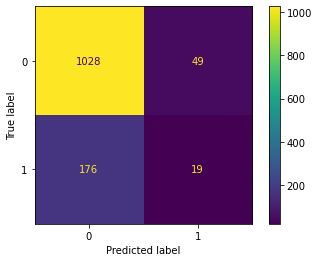

In [182]:
plot_confusion_matrix(knn_model, X_test_final, y_test)

# SMOTE (Synthetic Minority Oversampling Technique)
#### In this process new instances are synthesized from the existing data. SMOTE looks into minority class instances and use k nearest neighbor to select a random nearest neighbor, and a synthetic instance is created randomly in feature space.

In [183]:
from imblearn.over_sampling import SMOTE

In [184]:
sm = SMOTE(sampling_strategy='minority', random_state = 42)

In [185]:
X_train_sm,y_train_sm = sm.fit_resample(X_train_final,y_train)

In [186]:
X_train_sm.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,education_1.0,education_2.0,education_3.0,education_4.0,male,currentSmoker,prevalentHyp
0,0.525340,2.638073,0.206902,0.967911,-0.070553,-0.531390,-0.076405,-0.390248,0,1,0,0,1,1,0
1,-0.646204,1.784400,2.640016,0.389012,0.369275,0.193165,1.644818,-0.037067,0,0,1,0,1,1,0
2,-0.411896,0.503891,-0.106271,-0.817026,-1.126141,-0.141245,-0.076405,-1.802969,0,1,0,0,0,1,0
3,-1.349131,0.503891,-2.081671,-0.431094,-0.598347,-1.412534,-1.367323,0.227818,0,1,0,0,1,1,0
4,-1.114822,0.503891,-0.877159,-0.455214,-0.686313,-1.449691,-1.367323,-1.096608,0,1,0,0,1,1,0


In [187]:
y_train_sm.head()

0    0
1    0
2    1
3    0
4    0
Name: CVD, dtype: int64

In [188]:
print("length of oversampled data: ",len(X_train_sm))
print("length of oversampled data: ",len(y_train_sm))
#print("Number of no subscription in oversampled data",len(y_train_os[y_train_os['y']==0]))
from collections import Counter
print(Counter(y_train))
print(Counter(y_train_sm))

length of oversampled data:  5038
length of oversampled data:  5038
Counter({0: 2519, 1: 449})
Counter({0: 2519, 1: 2519})


In [189]:
len(X_test_final), len(y_test)

(1272, 1272)

In [190]:
knn = KNeighborsClassifier(n_neighbors = 3)

# Training the model
KNN_model = knn.fit(X_train_sm , y_train_sm)

### predicting the train set

In [191]:
y_pred_train_sm = KNN_model.predict(X_train_sm)
accuracy_score(y_train_sm, y_pred_train_sm)

0.9142516871774514

## predicting test set

In [192]:
y_pred_test_KNN = KNN_model.predict(X_test_final)
accuracy_score(y_test, y_pred_test_KNN)

0.675314465408805

### Accuracy is 68% for the test set and 91% for train set, seems that the model has overfitted

In [193]:
y_test[:10]

1350    1
1434    0
2500    0
1128    0
4144    1
3883    0
3624    0
794     0
298     0
184     0
Name: CVD, dtype: int64

In [194]:
y_pred_test_KNN[:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

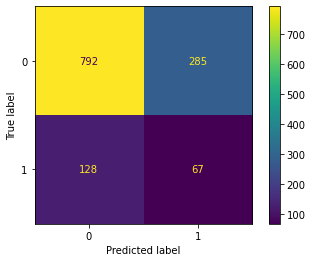

In [195]:
plot_confusion_matrix(KNN_model, X_test_final, y_test)

### Performance Metric of the model for K=3

In [196]:
Confusion_Matrix(y_test, y_pred_test_KNN)

[[792 285]
 [128  67]]
correctly specified percentage :  67.5314465408805
Incorrectly specified percentage :  32.4685534591195
Positive Prediction rate(Precision) :  0.1903409090909091
Negative Prediction Rate :  0.8608695652173913
Sensitivity : 0.3435897435897436
Specificity : 0.7353760445682451


### we can see that the Sensitivity has been increased from 9.7% to 34.35% i.e,  i.e, it can identify almost 34 people truly having Cardio viscular disease out of all people actually having CVD and Specificity is 73.53% i.e, out of all people who are actually not having CVD, 74 people can be identified by the classifier.

In [197]:
from sklearn.metrics import precision_score, recall_score

In [198]:
def classification_metrics(x,y):
    print("Precision score is: ", precision_score(x,y))
    print("Recall score is: ", recall_score(x,y))
    print("F1 score is: ", f1_score(x,y, average='weighted'))

In [199]:
classification_metrics(y_test, y_pred_test_KNN)

Precision score is:  0.1903409090909091
Recall score is:  0.3435897435897436
F1 score is:  0.709147052474818


### The model's precision is low i.e, positive prediction rate is low.

In [200]:
f1_score(y_test,y_pred_test_KNN,average='weighted')

0.709147052474818

### Classification Report for the test set

In [201]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test_KNN))

              precision    recall  f1-score   support

           0       0.86      0.74      0.79      1077
           1       0.19      0.34      0.24       195

    accuracy                           0.68      1272
   macro avg       0.53      0.54      0.52      1272
weighted avg       0.76      0.68      0.71      1272



In [202]:
knn_roc_auc = roc_auc_score(y_test, KNN_model.predict(X_test_final))
fpr, tpr, thresholds = roc_curve(y_test, KNN_model.predict_proba(X_test_final)[:,1])

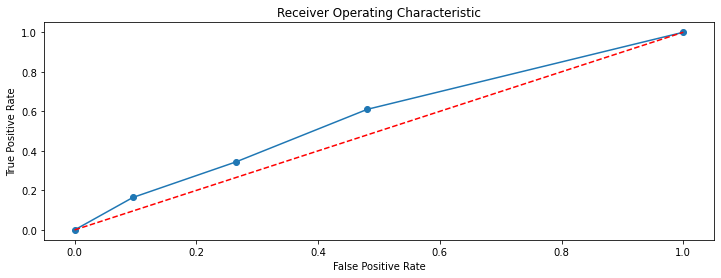

In [203]:
plt.figure(figsize=(12,4))
plt.plot(fpr, tpr, marker = 'o')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()

In [204]:
print("The AUC ROC score is: ",knn_roc_auc)

The AUC ROC score is:  0.5394828940789944


In [205]:
y_pred_prob = KNN_model.predict_proba(X_test_final)

In [206]:
y_pred_prob[:]

array([[0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       ...,
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333]])

## Finding for best value of K

In [207]:
iter_len = len(X_test_final)
iter_size = round(np.sqrt(iter_len))
validation_error = []
for i in range(1, iter_size):
    knn_classifier = KNeighborsClassifier(n_neighbors=i)
    knn_classifier.fit(X_train_sm, y_train_sm)
    pred_i = knn_classifier.predict(X_test_final)
    #print(pred_i)
    validation_error.append(np.mean(pred_i != y_test))
    #print(validation_error)
print("The minimum error we get is ", min(validation_error))
print("The corresponding K value is ", 1+validation_error.index(min(validation_error)))

The minimum error we get is  0.24213836477987422
The corresponding K value is  2


## Elbow Curve for KNN

Text(0, 0.5, 'Validation Error Rate')

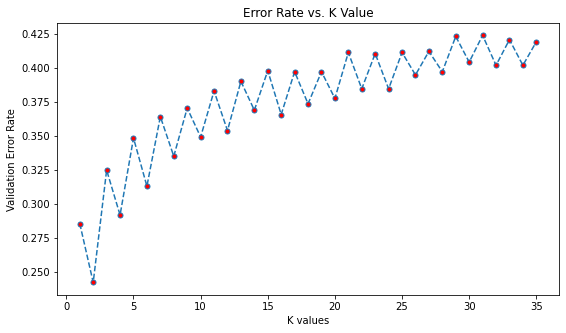

In [208]:
plt.figure(figsize=(9,5))
plt.plot(range(1, iter_size), validation_error, linestyle='dashed', marker = 'o',markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K values')
plt.ylabel('Validation Error Rate')

### Though from the graph we can see that at k=2 the error is lowest but increasing the value of k can lead to high error. 


### Checking with k=2

In [209]:
KNN_2 = KNeighborsClassifier(n_neighbors=2).fit(X_train_sm, y_train_sm)

### Performance Metric of the model of K=2

In [210]:
y_pred_2_train = KNN_2.predict(X_train_final)
y_pred_2_test = KNN_2.predict(X_test_final)
Confusion_Matrix(y_test, y_pred_2_test)
classification_metrics(y_test, y_pred_2_test)

[[926 151]
 [157  38]]
correctly specified percentage :  75.78616352201259
Incorrectly specified percentage :  24.21383647798742
Positive Prediction rate(Precision) :  0.20105820105820105
Negative Prediction Rate :  0.8550323176361958
Sensitivity : 0.19487179487179487
Specificity : 0.8597957288765088
Precision score is:  0.20105820105820105
Recall score is:  0.19487179487179487
F1 score is:  0.7563062325296995


In [211]:
accuracy_score(y_test, y_pred_2_test)

0.7578616352201258

In [212]:
f1_score(y_test,y_pred_2_test,average='weighted')

0.7563062325296995

In [213]:
f1_score(y_train,y_pred_2_train,average='weighted')

0.99695500935433

In [214]:
knn_2_roc_auc = roc_auc_score(y_test, KNN_2.predict(X_test_final))
fpr, tpr, thresholds = roc_curve(y_test, KNN_2.predict_proba(X_test_final)[:,1])

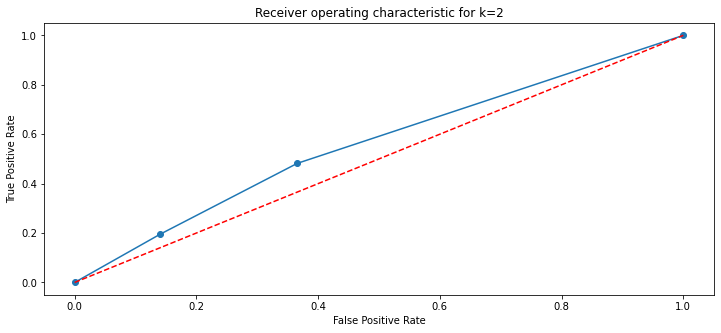

In [215]:
plt.figure(figsize=(12,5))
plt.plot(fpr, tpr, marker ='o')

plt.plot([0, 1], [0, 1],'r--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for k=2')
plt.show()

In [216]:
print('AUC ROC score is :' ,knn_2_roc_auc)

AUC ROC score is : 0.5273337618741518


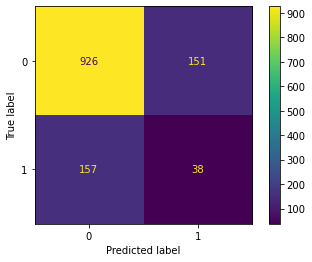

In [217]:
plot_confusion_matrix(KNN_2, X_test_final, y_test)

In [218]:
print(classification_report(y_train, y_pred_2_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2519
           1       1.00      0.98      0.99       449

    accuracy                           1.00      2968
   macro avg       1.00      0.99      0.99      2968
weighted avg       1.00      1.00      1.00      2968



In [219]:
print(classification_report(y_test, y_pred_2_test))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1077
           1       0.20      0.19      0.20       195

    accuracy                           0.76      1272
   macro avg       0.53      0.53      0.53      1272
weighted avg       0.75      0.76      0.76      1272



### For k=2, it doesn't seem to be a good model as the sensitivity i.e, True Positive Prediction rate is low than the earlier model

In [220]:
Accuracy = []
for i in range(1, iter_size):
    knn_i = KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(X_train_sm,y_train_sm)
    y_pred_i = knn_i.predict(X_test_final)
    Accuracy.append(accuracy_score(y_test, y_pred_i))

Text(0, 0.5, 'Testing Accuracy')

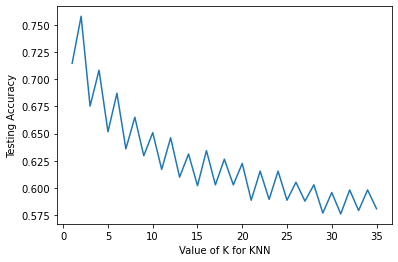

In [221]:
plt.plot(range(1,iter_size), Accuracy)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

### Looking at the scores we can't say that KNN is a good model for this problem

## Logistic Regression

In [222]:
from sklearn.linear_model import LogisticRegression

In [223]:
lr = LogisticRegression()

# Training the model
lr_model = lr.fit(X_train_sm , y_train_sm)

In [224]:
y_pred_train_lr = lr_model.predict(X_train_sm)

In [225]:
accuracy_score(y_train_sm, y_pred_train_lr)

0.7373957919809448

## predicting the test set

In [226]:
y_pred_test_lr  = lr_model.predict(X_test_final)

In [227]:
accuracy_score(y_test,y_pred_test_lr)

0.6949685534591195

## Confusion Matrix

In [228]:
Confusion_Matrix(y_test, y_pred_test_lr)

[[805 272]
 [116  79]]
correctly specified percentage :  69.49685534591194
Incorrectly specified percentage :  30.50314465408805
Positive Prediction rate(Precision) :  0.22507122507122507
Negative Prediction Rate :  0.8740499457111836
Sensitivity : 0.40512820512820513
Specificity : 0.7474466109563602


In [229]:
classification_metrics(y_test, y_pred_test_lr)

Precision score is:  0.22507122507122507
Recall score is:  0.40512820512820513
F1 score is:  0.7266363398438871


### In this model, the Recall or True Positive Rate is increased. So , we can say that , out of all actully cardio viscular diseased people, 40 people can be identified by the model. Other metric such as accuracy is a bit higher for the train set. F1 score is almost in the same range as with the previous KNN models with k=3 and k=2 

In [230]:
#sns.heatmap(cm, annot=True, cmap = ListedColormap(['lightskyblue']), fmt='d', annot_kws={'size':20}, linewidths=0.8)

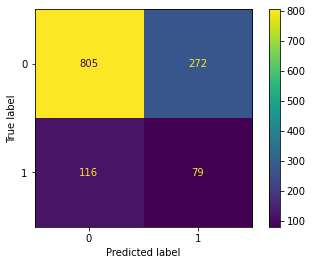

In [231]:
plot_confusion_matrix(lr_model, X_test_final, y_test)

### Classification Report for Logistoc Regression

In [232]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test_lr))

              precision    recall  f1-score   support

           0       0.87      0.75      0.81      1077
           1       0.23      0.41      0.29       195

    accuracy                           0.69      1272
   macro avg       0.55      0.58      0.55      1272
weighted avg       0.77      0.69      0.73      1272



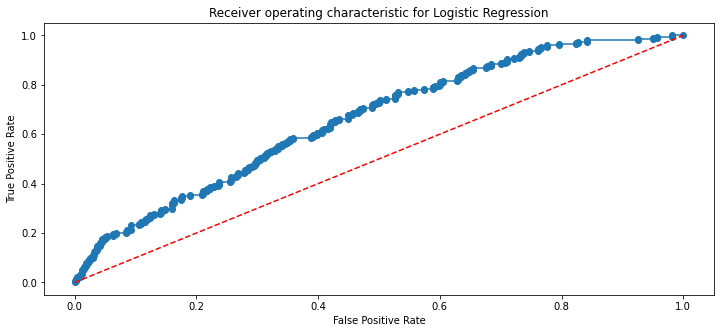

In [233]:
logit_roc_auc = roc_auc_score(y_test, lr_model.predict(X_test_final))
fpr, tpr, thresholds = roc_curve(y_test, lr_model.predict_proba(X_test_final)[:,1])

plt.figure(figsize=(12,5))
plt.plot(fpr, tpr, marker ='o')

plt.plot([0, 1], [0, 1],'r--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Logistic Regression')
plt.show()

In [234]:
print("The AUC ROC score is: ",logit_roc_auc)

The AUC ROC score is:  0.5762874080422826


## Decision Tree Classifier

In [235]:
from sklearn.tree import DecisionTreeClassifier

In [236]:
DT_train_accuracy = []
DT_test_accuracy = []
for depth in range(1,15):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(X_train_sm, y_train_sm)
    DT_train_accuracy.append(dt_model.score(X_train_sm, y_train_sm))
    DT_test_accuracy.append(dt_model.score(X_test_final, y_test))

In [237]:
DT_frame = pd.DataFrame({'max_depth': range(1,15), 'train_accuracy': DT_train_accuracy, 'test_accuracy': DT_test_accuracy})

In [238]:
DT_frame

,max_depth,train_accuracy,test_accuracy
0,1,0.664549,0.555031
1,2,0.664549,0.555031
2,3,0.674077,0.582547
3,4,0.701469,0.588836
4,5,0.729059,0.652516
5,6,0.754069,0.656447
6,7,0.781858,0.694969
7,8,0.808654,0.699686
8,9,0.830885,0.700472
9,10,0.859667,0.700472


### With increasing depth of the tree, the test accuracy is decreasing and train accuracy is increasing. As Decision Tree is high variance and low bias so it has a high chance to be overfitted when it will grow up to full length. So, we are taking max_depth = 5 for Decision Tree for further process as with this max_depth the difference between the train and test accuracy is lesser than all other

In [239]:
Dec_Tree = DecisionTreeClassifier(max_depth = 5)

In [240]:
Dec_Tree.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(max_depth=5)

## Predicting Train set

In [241]:
y_pred_train_tree = Dec_Tree.predict(X_train_sm)

In [242]:
accuracy_score(y_train_sm, y_pred_train_tree)

0.7290591504565304

In [243]:
y_pred_train_tree[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0],
      dtype=int64)

## Predicting Test Set

In [244]:
y_pred_test_tree = Dec_Tree.predict(X_test_final)

In [245]:
accuracy_score(y_test, y_pred_test_tree)

0.6525157232704403

In [246]:
y_pred_test_tree[:20]

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0],
      dtype=int64)

## Confusion Matrix

In [247]:
Confusion_Matrix(y_test, y_pred_test_tree)

[[721 356]
 [ 86 109]]
correctly specified percentage :  65.25157232704403
Incorrectly specified percentage :  34.74842767295597
Positive Prediction rate(Precision) :  0.23440860215053763
Negative Prediction Rate :  0.8934324659231723
Sensitivity : 0.558974358974359
Specificity : 0.669452181987001


In [248]:
classification_metrics(y_test, y_pred_test_tree)

Precision score is:  0.23440860215053763
Recall score is:  0.558974358974359
F1 score is:  0.6986927015619481


### We can see above that, Recall or Sensitivity of Decision Tree Model (max_depth=5) is quite good than previous models. i.e, This model can identify approx 55 person out of all people who have actually cardio viscualr disease actual cardio. In other hand its precision is quite low. i.e, its positive prediction power is low (approximately 23%)

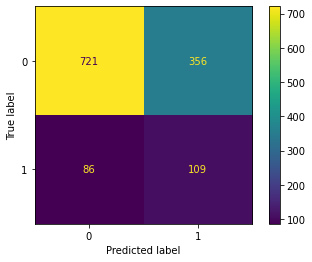

In [249]:
plot_confusion_matrix(Dec_Tree, X_test_final, y_test)

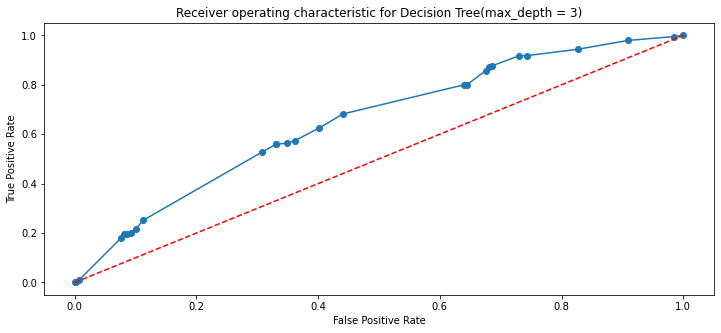

In [250]:
DT_roc_auc = roc_auc_score(y_test, Dec_Tree.predict(X_test_final))
fpr, tpr, thresholds = roc_curve(y_test, Dec_Tree.predict_proba(X_test_final)[:,1])
plt.figure(figsize=(12,5))

plt.plot(fpr, tpr, marker = 'o')

plt.plot([0, 1], [0, 1],'r--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Decision Tree(max_depth = 3)')
plt.show()

In [251]:
print("The AUC ROC score is: ",DT_roc_auc)

The AUC ROC score is:  0.61421327048068


## Random Forest Classifier

In [252]:
from sklearn.ensemble import RandomForestClassifier

In [253]:
forest_classifier = RandomForestClassifier()

In [254]:
forest_classifier.fit(X_train_sm, y_train_sm)

RandomForestClassifier()

### Predicting the train set

In [255]:
y_train_pred_forest = forest_classifier.predict(X_train_sm)

In [256]:
y_train_sm[:10]

0    0
1    0
2    1
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: CVD, dtype: int64

In [257]:
y_train_pred_forest[:10]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### Predicting the test set

In [258]:
y_test_pred_forest = forest_classifier.predict(X_test_final)

In [259]:
y_test[:10]

1350    1
1434    0
2500    0
1128    0
4144    1
3883    0
3624    0
794     0
298     0
184     0
Name: CVD, dtype: int64

In [260]:
y_test_pred_forest[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

#### Checking Accuracy score for train and test set

In [261]:
accuracy_score(y_train_sm, y_train_pred_forest)

1.0

In [262]:
accuracy_score(y_test, y_test_pred_forest)

0.7955974842767296

In [263]:
Confusion_Matrix(y_test, y_test_pred_forest)

[[979  98]
 [162  33]]
correctly specified percentage :  79.55974842767296
Incorrectly specified percentage :  20.440251572327046
Positive Prediction rate(Precision) :  0.25190839694656486
Negative Prediction Rate :  0.8580192813321648
Sensitivity : 0.16923076923076924
Specificity : 0.9090064995357474


In [264]:
classification_metrics(y_test, y_test_pred_forest)

Precision score is:  0.25190839694656486
Recall score is:  0.16923076923076924
F1 score is:  0.7784824329787192


### The Recall or Sensitivity score i.e, True Positive prediction rate has been decreased than before. F1 score has been increased

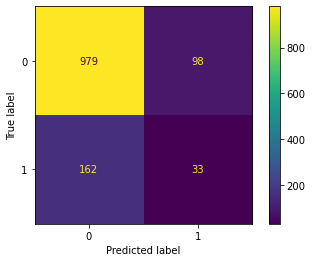

In [265]:
plot_confusion_matrix(forest_classifier, X_test_final, y_test)

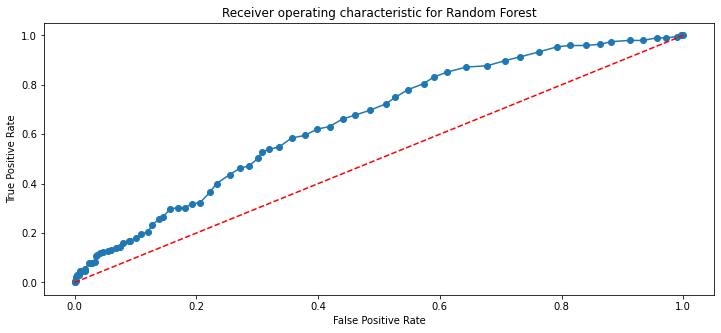

In [266]:
forest_roc_auc = roc_auc_score(y_test, forest_classifier.predict(X_test_final))
fpr, tpr, thresholds = roc_curve(y_test, forest_classifier.predict_proba(X_test_final)[:,1])
plt.figure(figsize=(12,5))

plt.plot(fpr, tpr, marker = 'o')

plt.plot([0, 1], [0, 1],'r--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Random Forest')
plt.show()

In [267]:
roc_auc_score(y_test, forest_classifier.predict(X_test_final))

0.5391186343832584

In [269]:
print(classification_report(y_test, y_test_pred_forest))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1077
           1       0.25      0.17      0.20       195

    accuracy                           0.80      1272
   macro avg       0.55      0.54      0.54      1272
weighted avg       0.77      0.80      0.78      1272



In [270]:
from pprint import pprint

In [271]:
print('Parameters currently in use:\n')
pprint(forest_classifier.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


## Performing Random search for finding best parameter

In [272]:
#from sklearn.model_selection import GridSearchCV

In [273]:
#param_grid = [{'n_estimators':[int(x) for x in np.linspace(start = 100, stop = 800, num = 20)], 
#               'max_features':[4,6], 
#               'bootstrap': [True],
#               'max_depth':[int(x) for x in np.linspace(start = 3, stop = 25, num = 5)]}]
#              'min_samples_split': [6,8],
#              'min_samples_leaf': [1,2]}]

#Forest_Classifier_model = RandomForestClassifier()
#grid_search = GridSearchCV(Forest_Classifier_model, param_grid, cv=5, scoring = 'accuracy')

In [274]:
#grid_search

In [571]:
#grid_search.fit(X_train_sm, y_train_sm)

In [ ]:
#forest_classifier.fit(X_train_sm, y_train_sm)

In [319]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [320]:
Grid_param_grid = [{'n_estimators':[int(x) for x in np.linspace(start = 100, stop = 800, num = 20)], 
               'max_features':[4,6], 'min_samples_split': [4,6,8], 'min_samples_leaf': [1,2,4],
               'bootstrap': [True, False],
               'max_depth':[int(x) for x in np.linspace(start = 3, stop = 25, num = 5)]}]

In [321]:
forest = RandomForestClassifier()
grid_search = GridSearchCV(forest, Grid_param_grid, cv = 3, scoring= 'accuracy')

In [322]:
grid_search

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [3, 8, 14, 19, 25],
                          'max_features': [4, 6], 'min_samples_leaf': [1, 2, 4],
                          'min_samples_split': [4, 6, 8],
                          'n_estimators': [100, 136, 173, 210, 247, 284, 321,
                                           357, 394, 431, 468, 505, 542, 578,
                                           615, 652, 689, 726, 763, 800]}],
             scoring='accuracy')

In [327]:
#grid_search.fit(X_train_sm, y_train_sm)

In [324]:
random_param_grid = [{'n_estimators':[int(x) for x in np.linspace(start = 100, stop = 800, num = 20)], 
               'max_features':[4,6], 'min_samples_split': [4,6,8], 'min_samples_leaf': [1,2,4],
               'bootstrap': [True, False],
               'max_depth':[int(x) for x in np.linspace(start = 3, stop = 25, num = 5)]}]

Forest_Classifier_model = RandomForestClassifier()
random_search = RandomizedSearchCV(Forest_Classifier_model, random_param_grid, cv=5, scoring = 'recall')

In [325]:
random_search

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions=[{'bootstrap': [True, False],
                                         'max_depth': [3, 8, 14, 19, 25],
                                         'max_features': [4, 6],
                                         'min_samples_leaf': [1, 2, 4],
                                         'min_samples_split': [4, 6, 8],
                                         'n_estimators': [100, 136, 173, 210,
                                                          247, 284, 321, 357,
                                                          394, 431, 468, 505,
                                                          542, 578, 615, 652,
                                                          689, 726, 763,
                                                          800]}],
                   scoring='recall')

In [326]:
# Fit the random search model
random_search.fit(X_train_sm, y_train_sm)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions=[{'bootstrap': [True, False],
                                         'max_depth': [3, 8, 14, 19, 25],
                                         'max_features': [4, 6],
                                         'min_samples_leaf': [1, 2, 4],
                                         'min_samples_split': [4, 6, 8],
                                         'n_estimators': [100, 136, 173, 210,
                                                          247, 284, 321, 357,
                                                          394, 431, 468, 505,
                                                          542, 578, 615, 652,
                                                          689, 726, 763,
                                                          800]}],
                   scoring='recall')

In [328]:
random_search.best_params_

{'n_estimators': 431,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 4,
 'max_depth': 19,
 'bootstrap': False}

In [329]:
best_model = random_search.best_estimator_

In [330]:
best_model

RandomForestClassifier(bootstrap=False, max_depth=19, max_features=4,
                       min_samples_split=4, n_estimators=431)

### Predicting The Train Set

In [331]:
y_train_pred_best_model = best_model.predict(X_train_sm)

In [332]:
y_train_pred_best_model[:10]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [333]:
y_train_sm[:10]

0    0
1    0
2    1
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: CVD, dtype: int64

In [334]:
accuracy_score(y_train_sm, y_train_pred_best_model)

1.0

In [335]:
classification_metrics(y_train_sm, y_train_pred_best_model)

Precision score is:  1.0
Recall score is:  1.0
F1 score is:  1.0


### Predicting Test Set

In [336]:
y_test_pred_best_model = best_model.predict(X_test_final)

In [337]:
y_test_pred_best_model[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [338]:
y_test[:10]

1350    1
1434    0
2500    0
1128    0
4144    1
3883    0
3624    0
794     0
298     0
184     0
Name: CVD, dtype: int64

In [339]:
accuracy_score(y_test_pred_best_model, y_test)

0.8050314465408805

In [340]:
Confusion_Matrix(y_test, y_test_pred_best_model)

[[985  92]
 [156  39]]
correctly specified percentage :  80.50314465408806
Incorrectly specified percentage :  19.49685534591195
Positive Prediction rate(Precision) :  0.29770992366412213
Negative Prediction Rate :  0.8632778264680105
Sensitivity : 0.2
Specificity : 0.914577530176416


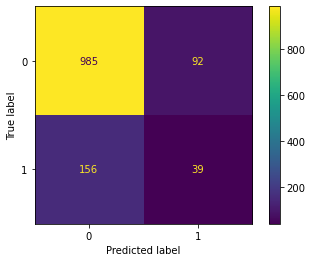

In [341]:
plot_confusion_matrix(best_model, X_test_final, y_test)

In [342]:
classification_metrics(y_test, y_test_pred_best_model)

Precision score is:  0.29770992366412213
Recall score is:  0.2
F1 score is:  0.7887063206873938


### ROC curve 

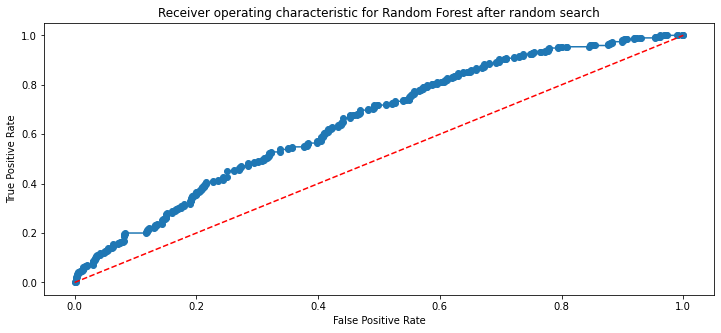

In [343]:
best_model_roc_auc = roc_auc_score(y_test, best_model.predict(X_test_final))
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test_final)[:,1])
plt.figure(figsize=(12,5))

plt.plot(fpr, tpr, marker = 'o')

plt.plot([0, 1], [0, 1],'r--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Random Forest after random search')
plt.show()

In [344]:
print("The AUC ROC score for Random Forest with best parameter is: ",best_model_roc_auc )

The AUC ROC score for Random Forest with best parameter is:  0.5572887650882079


In [345]:
from sklearn.model_selection import cross_val_score

In [346]:
best_model_hpt_accuracy_train = cross_val_score(best_model, X_train_sm, y_train_sm, cv = 5, scoring = 'accuracy')

In [347]:
best_model_hpt_accuracy_train

array([0.80059524, 0.93452381, 0.93154762, 0.93247269, 0.91658391])

In [348]:
best_model_hpt_accuracy_test = cross_val_score(best_model, X_test_final, y_test, cv = 5, scoring = 'accuracy')

In [349]:
best_model_hpt_accuracy_test

array([0.81960784, 0.83921569, 0.8503937 , 0.8503937 , 0.83464567])

## Ada Boost Classifier

In [350]:
from sklearn.ensemble import AdaBoostClassifier

In [351]:
ada_model = AdaBoostClassifier()

In [352]:
# Training the model
ada_model = ada_model.fit(X_train_sm , y_train_sm)

In [353]:
y_pred_train_ada_model = ada_model.predict(X_train_sm)

In [354]:
accuracy_score(y_train_sm, y_pred_train_ada_model)

0.778086542278682

## predicting the test set

In [355]:
y_pred_test_ada_model  = ada_model.predict(X_test_final)

accuracy_score(y_test, y_pred_test_ada_model)

0.7122641509433962

## Confusion Matrix

In [356]:
#cm = confusion_matrix(y_test, y_pred_test_ada_model)

In [357]:
#cm

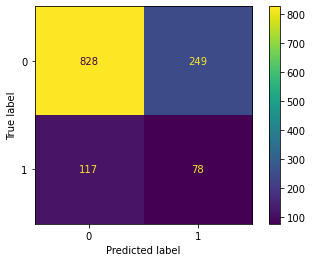

In [358]:
plot_confusion_matrix(ada_model, X_test_final, y_test)

In [359]:
Confusion_Matrix(y_test, y_pred_test_ada_model)

[[828 249]
 [117  78]]
correctly specified percentage :  71.22641509433963
Incorrectly specified percentage :  28.77358490566038
Positive Prediction rate(Precision) :  0.23853211009174313
Negative Prediction Rate :  0.8761904761904762
Sensitivity : 0.4
Specificity : 0.7688022284122563


In [360]:
classification_metrics(y_test, y_pred_test_ada_model)

Precision score is:  0.23853211009174313
Recall score is:  0.4
F1 score is:  0.7392525743175107


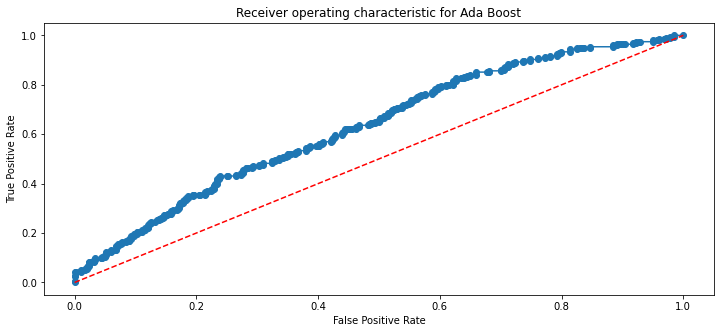

In [361]:
adaboost_model_roc_auc = roc_auc_score(y_test, ada_model.predict(X_test_final))
fpr, tpr, thresholds = roc_curve(y_test, ada_model.predict_proba(X_test_final)[:,1])
plt.figure(figsize=(12,5))

plt.plot(fpr, tpr, marker = 'o')

plt.plot([0, 1], [0, 1],'r--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Ada Boost')
plt.show()

In [362]:
print("The AUc ROC score of Ada Boost: ", adaboost_model_roc_auc)

The AUc ROC score of Ada Boost:  0.5844011142061281
